In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

T = 80
alpha = 0.3
beta = 2.0
pra = 0.7
prb = 0.3

ra = tfp.distributions.Bernoulli(probs=pra, dtype=tf.float32)
rb = tfp.distributions.Bernoulli(probs=prb, dtype=tf.float32)
Q = np.zeros((2, T+1), dtype=np.float32)
pahist = np.zeros((T+1, ), dtype=np.float32)

for t in range(1, T):
    pa = 1. / (1 + tf.exp(-beta * (Q[0, t] - Q[1, t])))
    pahist[t+1] = pa
    a = tfp.distributions.Bernoulli(probs=pa, dtype=tf.bool).sample(1)[0]
    if a == True:
        Q[0, t+1] = Q[0, t] + alpha * (ra.sample(1)[0] - Q[0, t]) 
        Q[1, t+1] = Q[1, t]
    else:
        Q[1, t+1] = Q[1, t] + alpha * (rb.sample(1)[0] - Q[1, t]) 
        Q[0, t+1] = Q[0, t]

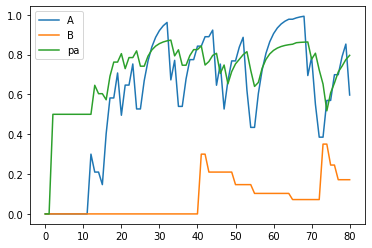

In [25]:
plt.plot(range(T+1), Q[0, :], label='A')
plt.plot(range(T+1), Q[1, :], label='B')
plt.plot(range(T+1), pahist, label='pa')
plt.legend()
plt.show()